<a href="https://www.kaggle.com/code/yashraj2023/endsem-project?scriptVersionId=272178405" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/electric-power-consumption-data-set/household_power_consumption.txt


In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/electric-power-consumption-data-set")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/electric-power-consumption-data-set


In [3]:
import pandas as pd
import os

# Example: Load the CSV file (adjust name if needed)
data_file = os.path.join(path, "household_power_consumption.txt")  # or .csv if unzipped

data = pd.read_csv(data_file, sep=';', 
                   parse_dates={'DateTime': ['Date', 'Time']},
                   infer_datetime_format=True,
                   na_values=['?'],
                   low_memory=False)

print(data.head())




/tmp/ipykernel_13/2747277094.py:7: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  data = pd.read_csv(data_file, sep=';',
/tmp/ipykernel_13/2747277094.py:7: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  data = pd.read_csv(data_file, sep=';',


             DateTime  Global_active_power  Global_reactive_power  Voltage  \
0 2006-12-16 17:24:00                4.216                  0.418   234.84   
1 2006-12-16 17:25:00                5.360                  0.436   233.63   
2 2006-12-16 17:26:00                5.374                  0.498   233.29   
3 2006-12-16 17:27:00                5.388                  0.502   233.74   
4 2006-12-16 17:28:00                3.666                  0.528   235.68   

   Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
0              18.4             0.0             1.0            17.0  
1              23.0             0.0             1.0            16.0  
2              23.0             0.0             2.0            17.0  
3              23.0             0.0             1.0            17.0  
4              15.8             0.0             1.0            17.0  


/tmp/ipykernel_13/2747277094.py:7: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data = pd.read_csv(data_file, sep=';',


In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 8 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   DateTime               datetime64[ns]
 1   Global_active_power    float64       
 2   Global_reactive_power  float64       
 3   Voltage                float64       
 4   Global_intensity       float64       
 5   Sub_metering_1         float64       
 6   Sub_metering_2         float64       
 7   Sub_metering_3         float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 126.7 MB
None


In [5]:
print(data.isnull().sum())

DateTime                     0
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64


In [6]:
data_clean = data.dropna()

In [7]:
data_clean.set_index('DateTime', inplace=True)

In [8]:
data_clean = data_clean.copy()

for col in data_clean.columns:
    data_clean[col] = pd.to_numeric(data_clean[col], errors='coerce')


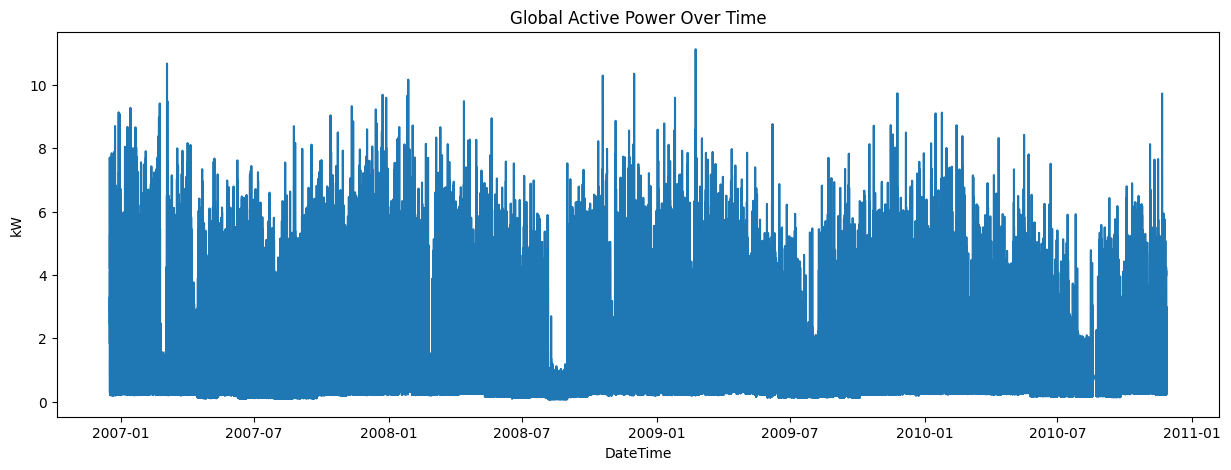

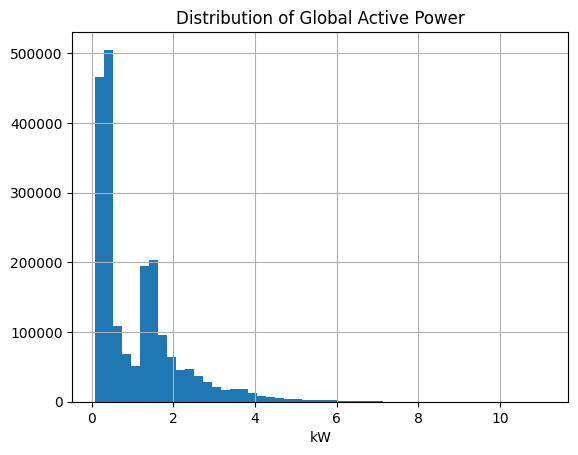

       Global_active_power  Global_reactive_power       Voltage  \
count         2.049280e+06           2.049280e+06  2.049280e+06   
mean          1.091615e+00           1.237145e-01  2.408399e+02   
std           1.057294e+00           1.127220e-01  3.239987e+00   
min           7.600000e-02           0.000000e+00  2.232000e+02   
25%           3.080000e-01           4.800000e-02  2.389900e+02   
50%           6.020000e-01           1.000000e-01  2.410100e+02   
75%           1.528000e+00           1.940000e-01  2.428900e+02   
max           1.112200e+01           1.390000e+00  2.541500e+02   

       Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
count      2.049280e+06    2.049280e+06    2.049280e+06    2.049280e+06  
mean       4.627759e+00    1.121923e+00    1.298520e+00    6.458447e+00  
std        4.444396e+00    6.153031e+00    5.822026e+00    8.437154e+00  
min        2.000000e-01    0.000000e+00    0.000000e+00    0.000000e+00  
25%        1.400000e+00   

In [9]:
import matplotlib.pyplot as plt

# Plot global active power over time
plt.figure(figsize=(15,5))
plt.plot(data_clean['Global_active_power'])
plt.title('Global Active Power Over Time')
plt.xlabel('DateTime')
plt.ylabel('kW')
plt.show()

# Histogram example
data_clean['Global_active_power'].hist(bins=50)
plt.title('Distribution of Global Active Power')
plt.xlabel('kW')
plt.show()

# Basic statistics
print(data_clean.describe())


In [10]:
# Resample to hourly averages (reduce minute noise)
data_hourly = data_clean.resample('1H').mean()

# Preview
print(data_hourly.head())


/tmp/ipykernel_13/3115019774.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  data_hourly = data_clean.resample('1H').mean()


                     Global_active_power  Global_reactive_power     Voltage  \
DateTime                                                                      
2006-12-16 17:00:00             4.222889               0.229000  234.643889   
2006-12-16 18:00:00             3.632200               0.080033  234.580167   
2006-12-16 19:00:00             3.400233               0.085233  233.232500   
2006-12-16 20:00:00             3.268567               0.075100  234.071500   
2006-12-16 21:00:00             3.056467               0.076667  237.158667   

                     Global_intensity  Sub_metering_1  Sub_metering_2  \
DateTime                                                                
2006-12-16 17:00:00         18.100000             0.0        0.527778   
2006-12-16 18:00:00         15.600000             0.0        6.716667   
2006-12-16 19:00:00         14.503333             0.0        1.433333   
2006-12-16 20:00:00         13.916667             0.0        0.000000   
2006-12-

In [11]:
data_hourly = data_hourly.copy()
data_hourly['hour'] = data_hourly.index.hour
data_hourly['dayofweek'] = data_hourly.index.dayofweek
data_hourly['is_weekend'] = (data_hourly['dayofweek'] >= 5).astype(int)

data_hourly.head()


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,hour,dayofweek,is_weekend
DateTime,,,,,,,,,,
2006-12-16 17:00:00,4.222889,0.229000,234.643889,18.100000,0.0,0.527778,16.861111,17,5,1
2006-12-16 18:00:00,3.632200,0.080033,234.580167,15.600000,0.0,6.716667,16.866667,18,5,1
2006-12-16 19:00:00,3.400233,0.085233,233.232500,14.503333,0.0,1.433333,16.683333,19,5,1
2006-12-16 20:00:00,3.268567,0.075100,234.071500,13.916667,0.0,0.000000,16.783333,20,5,1
2006-12-16 21:00:00,3.056467,0.076667,237.158667,13.046667,0.0,0.416667,17.216667,21,5,1


In [12]:
for lag in [1, 2, 3, 24]:
    data_hourly[f'lag_{lag}'] = data_hourly['Global_active_power'].shift(lag)

data_hourly['rolling_mean_3h'] = data_hourly['Global_active_power'].rolling(window=3).mean()
data_hourly['rolling_std_3h']  = data_hourly['Global_active_power'].rolling(window=3).std()

data_hourly = data_hourly.dropna()
data_hourly.head()


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,hour,dayofweek,is_weekend,lag_1,lag_2,lag_3,lag_24,rolling_mean_3h,rolling_std_3h
DateTime,,,,,,,,,,,,,,,,
2006-12-17 17:00:00,3.406767,0.166633,234.229833,14.510000,0.0,0.466667,16.816667,17,6,1,3.326033,2.985400,2.092633,4.222889,3.239400,0.223644
2006-12-17 18:00:00,3.697100,0.135067,234.372333,15.750000,0.0,0.000000,16.833333,18,6,1,3.406767,3.326033,2.985400,3.632200,3.476633,0.195150
2006-12-17 19:00:00,2.908400,0.265167,233.195667,12.516667,0.0,0.516667,16.683333,19,6,1,3.697100,3.406767,3.326033,3.400233,3.337422,0.398896
2006-12-17 20:00:00,3.361500,0.271500,236.426500,14.276667,0.0,1.116667,17.116667,20,6,1,2.908400,3.697100,3.406767,3.268567,3.322333,0.395806
2006-12-17 21:00:00,3.040767,0.267967,239.104167,12.716667,0.0,1.200000,17.500000,21,6,1,3.361500,2.908400,3.697100,3.056467,3.103556,0.232984


In [13]:
from sklearn.model_selection import train_test_split

X = data_hourly[['lag_1','lag_2','lag_3','lag_24','hour','dayofweek','is_weekend','rolling_mean_3h','rolling_std_3h']]
y = data_hourly['Global_active_power']

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)

print("Train samples:", len(X_train))
print("Test samples:", len(X_test))


Train samples: 27183
Test samples: 6796


In [14]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

model = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', Ridge(alpha=1.0))
])

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print("MAE:", mae, "RMSE:", rmse)




MAE: 0.0003094113673916394 RMSE: 0.00043281496452178065


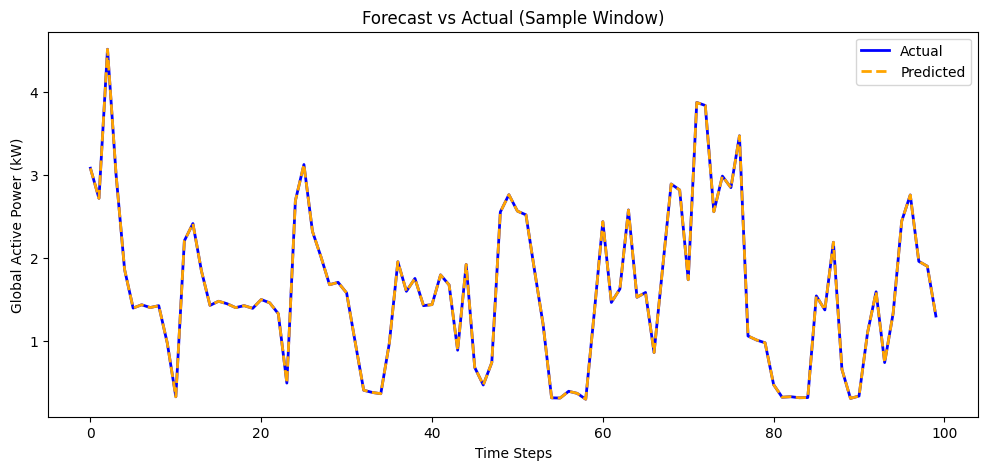

In [15]:
plt.figure(figsize=(12,5))
plt.plot(y_test.values[:100], label='Actual', color='blue', linewidth=2)
plt.plot(y_pred[:100], label='Predicted', color='orange', linestyle='--', linewidth=2)
plt.title('Forecast vs Actual (Sample Window)')
plt.xlabel('Time Steps')
plt.ylabel('Global Active Power (kW)')
plt.legend()
plt.show()


<Figure size 1200x500 with 0 Axes>

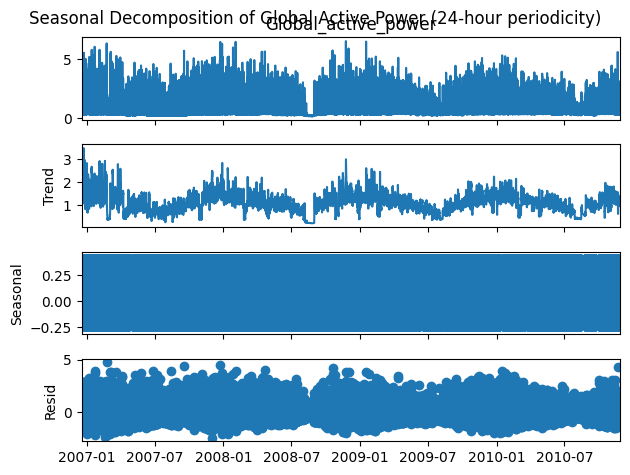

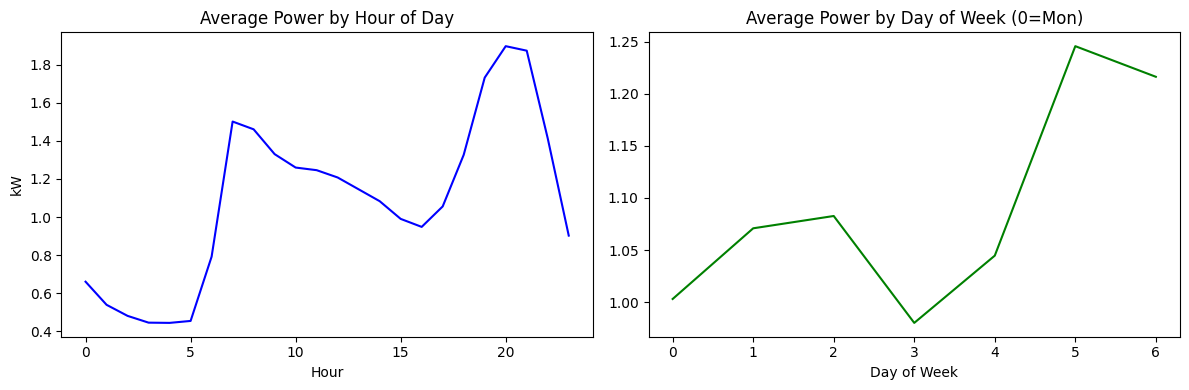

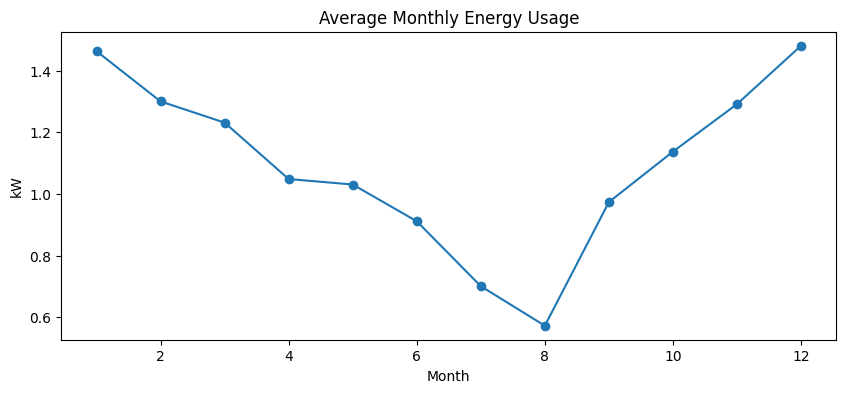

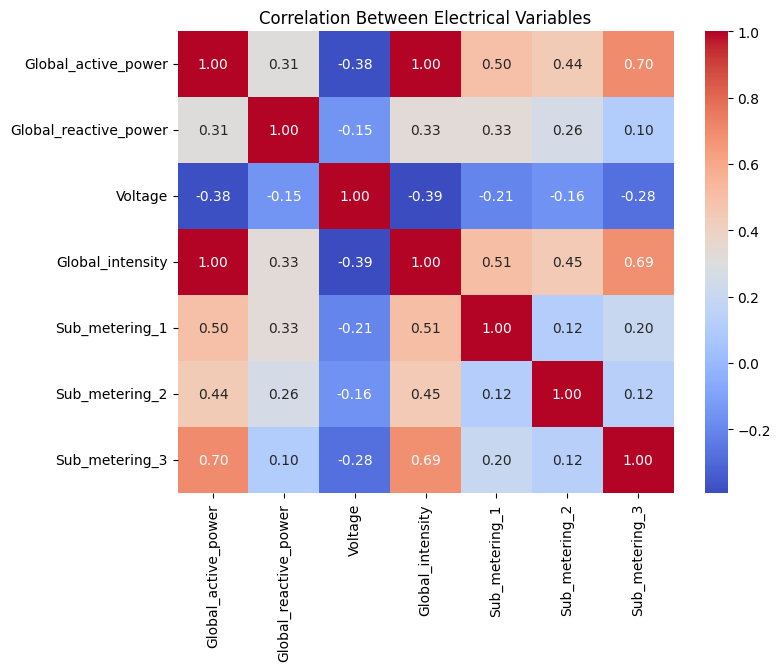

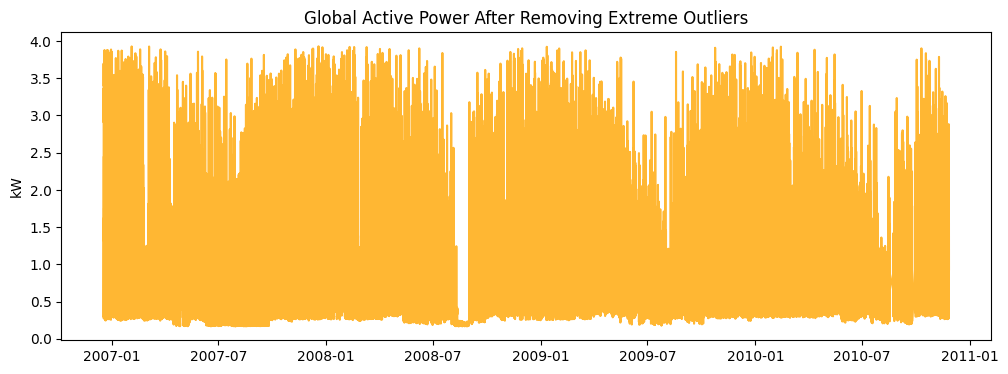

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


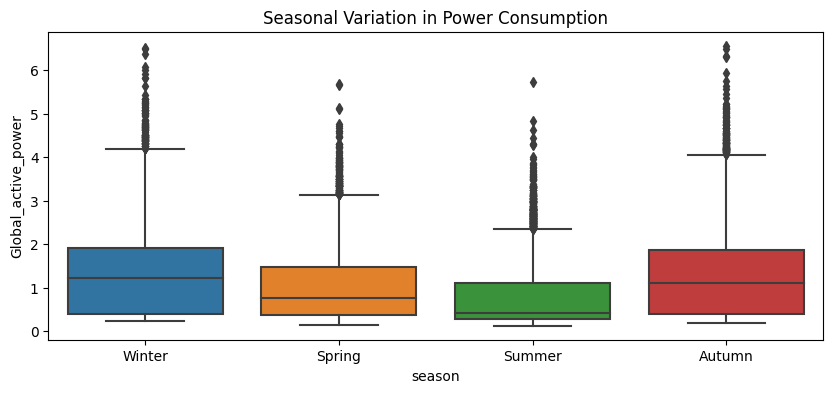

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


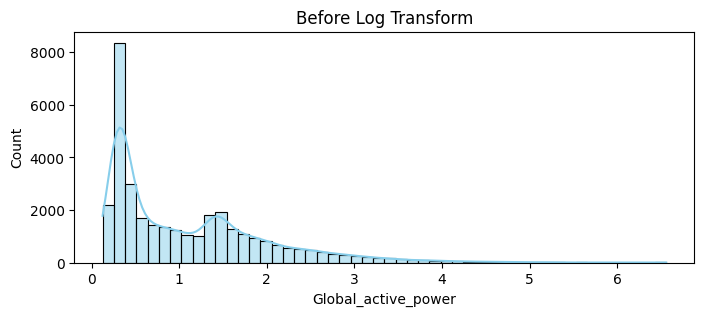

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


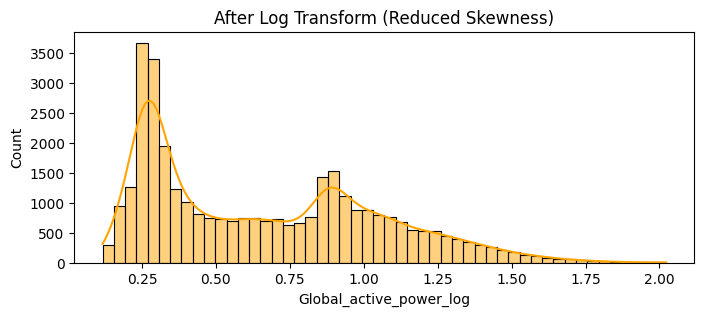

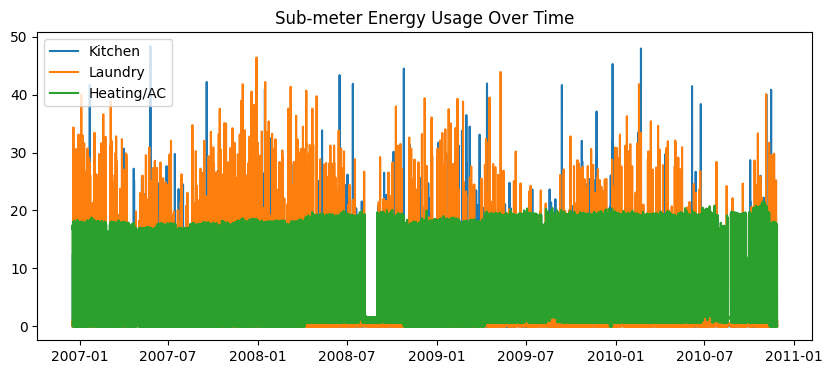

✅ Added columns: ['hour', 'dayofweek', 'is_weekend', 'lag_1', 'lag_2', 'lag_3', 'lag_24', 'rolling_mean_3h', 'rolling_std_3h', 'month', 'power_factor', 'diff_1', 'ewm_6h', 'sin_hour', 'cos_hour', 'sin_dow', 'cos_dow', 'season', 'Global_active_power_log']

Final dataset shape: (33979, 26)


In [16]:
# ============================================================
# ADVANCED EDA & FEATURE ENGINEERING FOR BETTER MODEL TRAINING
# ============================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

# 1️⃣ --- Seasonal Decomposition (Daily pattern) ---
plt.figure(figsize=(12, 5))
result = seasonal_decompose(data_hourly['Global_active_power'], model='additive', period=24)
result.plot()
plt.suptitle("Seasonal Decomposition of Global Active Power (24-hour periodicity)")
plt.show()

# 2️⃣ --- Hourly and Weekly Average Patterns ---
fig, ax = plt.subplots(1, 2, figsize=(12,4))
data_hourly.groupby('hour')['Global_active_power'].mean().plot(ax=ax[0], color='blue')
ax[0].set_title('Average Power by Hour of Day')
ax[0].set_xlabel('Hour')
ax[0].set_ylabel('kW')

data_hourly.groupby('dayofweek')['Global_active_power'].mean().plot(ax=ax[1], color='green')
ax[1].set_title('Average Power by Day of Week (0=Mon)')
ax[1].set_xlabel('Day of Week')
plt.tight_layout()
plt.show()

# 3️⃣ --- Monthly Trends ---
data_hourly['month'] = data_hourly.index.month
plt.figure(figsize=(10,4))
plt.plot(data_hourly.groupby('month')['Global_active_power'].mean(), marker='o')
plt.title('Average Monthly Energy Usage')
plt.xlabel('Month')
plt.ylabel('kW')
plt.show()

# 4️⃣ --- Correlation Heatmap ---
corr = data_hourly[['Global_active_power','Global_reactive_power','Voltage',
                    'Global_intensity','Sub_metering_1','Sub_metering_2','Sub_metering_3']].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Electrical Variables')
plt.show()

# 5️⃣ --- Outlier Removal & Visualization ---
q_low = data_hourly['Global_active_power'].quantile(0.01)
q_hi  = data_hourly['Global_active_power'].quantile(0.99)
filtered = data_hourly[(data_hourly['Global_active_power'] >= q_low) & 
                       (data_hourly['Global_active_power'] <= q_hi)]

plt.figure(figsize=(12,4))
plt.plot(filtered['Global_active_power'], color='orange', alpha=0.8)
plt.title('Global Active Power After Removing Extreme Outliers')
plt.ylabel('kW')
plt.show()

# 6️⃣ --- Power Factor & Derived Features ---
data_hourly['power_factor'] = data_hourly['Global_active_power'] / (
    data_hourly['Global_active_power'] + data_hourly['Global_reactive_power'] + 1e-5)

data_hourly['diff_1'] = data_hourly['Global_active_power'].diff()
data_hourly['ewm_6h'] = data_hourly['Global_active_power'].ewm(span=6).mean()

# 7️⃣ --- Fourier Features for Cyclic Encoding ---
data_hourly['sin_hour'] = np.sin(2 * np.pi * data_hourly['hour']/24)
data_hourly['cos_hour'] = np.cos(2 * np.pi * data_hourly['hour']/24)
data_hourly['sin_dow']  = np.sin(2 * np.pi * data_hourly['dayofweek']/7)
data_hourly['cos_dow']  = np.cos(2 * np.pi * data_hourly['dayofweek']/7)

# 8️⃣ --- Season Feature ---
data_hourly['season'] = pd.cut(data_hourly.index.month,
                               bins=[0,3,6,9,12],
                               labels=['Winter','Spring','Summer','Autumn'])

plt.figure(figsize=(10,4))
sns.boxplot(x='season', y='Global_active_power', data=data_hourly)
plt.title('Seasonal Variation in Power Consumption')
plt.show()

# 9️⃣ --- Log Transformation of Target (Skew Correction) ---
plt.figure(figsize=(8,3))
sns.histplot(data_hourly['Global_active_power'], bins=50, kde=True, color='skyblue')
plt.title("Before Log Transform")
plt.show()

data_hourly['Global_active_power_log'] = np.log1p(data_hourly['Global_active_power'])

plt.figure(figsize=(8,3))
sns.histplot(data_hourly['Global_active_power_log'], bins=50, kde=True, color='orange')
plt.title("After Log Transform (Reduced Skewness)")
plt.show()

# 🔟 --- Sub-meter Usage Pattern (for optimization prep) ---
plt.figure(figsize=(10,4))
plt.plot(data_hourly['Sub_metering_1'], label='Kitchen')
plt.plot(data_hourly['Sub_metering_2'], label='Laundry')
plt.plot(data_hourly['Sub_metering_3'], label='Heating/AC')
plt.title('Sub-meter Energy Usage Over Time')
plt.legend()
plt.show()

# ✅ --- Quick Summary of New Features ---
print("✅ Added columns:", 
      [col for col in data_hourly.columns if col not in ['Global_active_power','Global_reactive_power','Voltage',
                                                        'Global_intensity','Sub_metering_1','Sub_metering_2','Sub_metering_3']])
print("\nFinal dataset shape:", data_hourly.shape)


In [17]:
data_hourly.to_csv('/kaggle/working/data_hourly.csv', index=True)
forecast_df = pd.DataFrame({'datetime': data_hourly.index[-len(y_test):],
                            'actual': y_test.values,
                            'predicted': y_pred})
forecast_df.to_csv('/kaggle/working/forecast.csv', index=False)


In [18]:
# A. Ridge and Lasso Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, Lasso
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', Ridge())
])

param_grid = {'ridge__alpha': [0.1, 0.5, 1.0, 5.0, 10.0, 50.0]}
grid = GridSearchCV(pipe, param_grid, cv=3, scoring='neg_mean_absolute_error', n_jobs=-1)
grid.fit(X_train, y_train)
print("Best alpha:", grid.best_params_, "MAE:", -grid.best_score_)


Best alpha: {'ridge__alpha': 0.1} MAE: 5.274305800784294e-05


In [19]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

xgb = XGBRegressor(n_estimators=300, learning_rate=0.05, max_depth=5, random_state=42)
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)


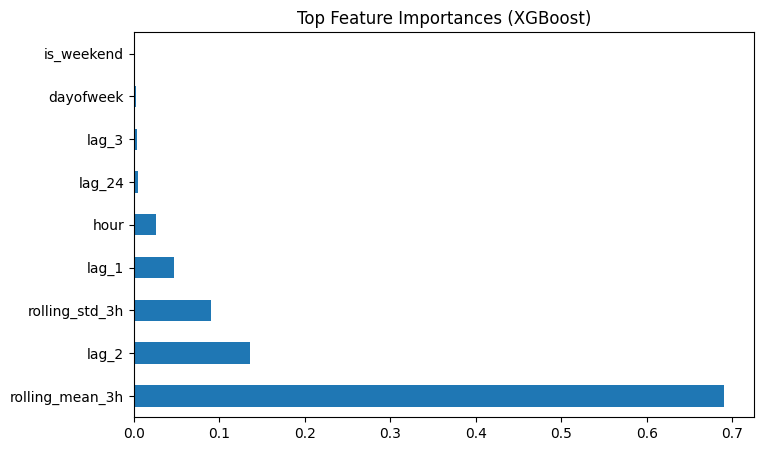

In [20]:
import matplotlib.pyplot as plt
import pandas as pd

feat_imp = pd.Series(xgb.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feat_imp.head(15).plot(kind='barh', figsize=(8,5))
plt.title("Top Feature Importances (XGBoost)")
plt.show()


In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# ---- tune on the training set (CV) ----
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', Ridge())
])

param_grid = {'ridge__alpha': [0.05, 0.1, 0.5, 1.0, 5.0, 10.0]}
grid = GridSearchCV(
    pipe, param_grid,
    cv=3,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    return_train_score=True
)
grid.fit(X_train, y_train)

best_alpha = grid.best_params_['ridge__alpha']
cv_mae = -grid.best_score_                      # flip sign
print(f"Best alpha from CV: {best_alpha}")
print(f"CV MAE (mean over folds): {cv_mae:.6f}")

# ---- refit best model and evaluate on the held-out test set ----
best_ridge = grid.best_estimator_               # already refit on full training set
ridge_y_pred = best_ridge.predict(X_test)

ridge_test_mae = mean_absolute_error(y_test, ridge_y_pred)
ridge_test_rmse = np.sqrt(mean_squared_error(y_test, ridge_y_pred))
print(f"Test MAE (best Ridge): {ridge_test_mae:.6f}")
print(f"Test RMSE (best Ridge): {ridge_test_rmse:.6f}")


Best alpha from CV: 0.05
CV MAE (mean over folds): 0.000026
Test MAE (best Ridge): 0.000015
Test RMSE (best Ridge): 0.000022


In [22]:
# --- Ridge (best alpha from CV) ---
best_ridge = grid.best_estimator_      # from your GridSearchCV
ridge_y_pred = best_ridge.predict(X_test)
ridge_mae = mean_absolute_error(y_test, ridge_y_pred)
ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_y_pred))

# --- XGBoost ---
xgb_y_pred = xgb.predict(X_test)
xgb_mae = mean_absolute_error(y_test, xgb_y_pred)
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_y_pred))


In [23]:
import pandas as pd

results = pd.DataFrame({
    'Model': ['Ridge (α=0.05)', 'XGBoost'],
    'MAE': [ridge_mae, xgb_mae],
    'RMSE': [ridge_rmse, xgb_rmse]
})

best_model_idx = results['MAE'].idxmin()
best_model_name = results.loc[best_model_idx, 'Model']

print(results)
print(f"\n🏆 Best model based on MAE: {best_model_name}")


            Model       MAE      RMSE
0  Ridge (α=0.05)  0.000015  0.000022
1         XGBoost  0.040784  0.059507

🏆 Best model based on MAE: Ridge (α=0.05)


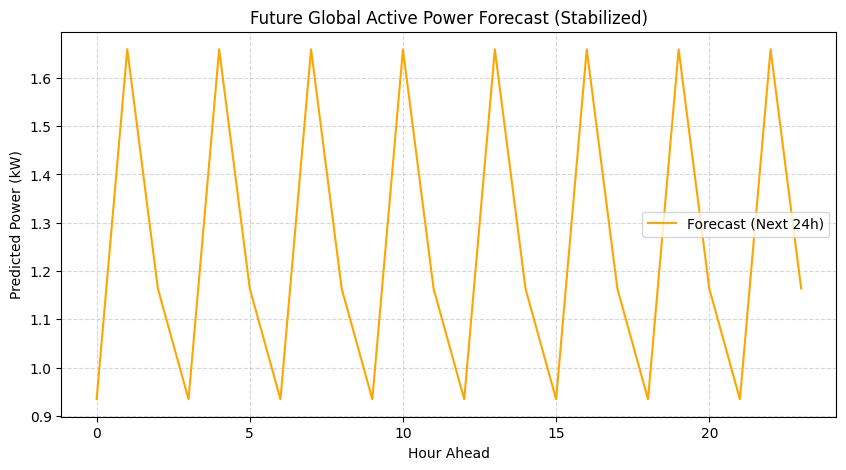

[0.9346738501182488, 1.659304510403927, 1.1637145259728694, 0.9346808718083903, 1.6592735539697545]


In [24]:
import numpy as np
import matplotlib.pyplot as plt

future_steps = 24
last_known_data = X_test.iloc[[-1]].copy()
forecast_values = []

for step in range(future_steps):
    # Align columns to training features
    last_known_data = last_known_data.reindex(columns=best_ridge.feature_names_in_, fill_value=0)
    
    # Predict next step
    pred = best_ridge.predict(last_known_data.ffill().fillna(0))[0]
    forecast_values.append(pred)

    # Update lag features dynamically
    last_known_data['lag_3'] = last_known_data['lag_2']
    last_known_data['lag_2'] = last_known_data['lag_1']
    last_known_data['lag_1'] = pred

    # Update rolling features
    last_known_data['rolling_mean_3h'] = (
        last_known_data[['lag_1', 'lag_2', 'lag_3']].mean(axis=1)
    )
    last_known_data['rolling_std_3h'] = (
        last_known_data[['lag_1', 'lag_2', 'lag_3']].std(axis=1)
    )

    # Update time features
    if 'hour' in last_known_data.columns:
        last_known_data['hour'] = (last_known_data['hour'] + 1) % 24
    if 'dayofweek' in last_known_data.columns:
        last_known_data['dayofweek'] = (
            last_known_data['dayofweek'] + (1 if last_known_data['hour'].iloc[0] == 0 else 0)
        ) % 7

plt.figure(figsize=(10,5))
plt.plot(range(future_steps), forecast_values, color='orange', label='Forecast (Next 24h)')
plt.title("Future Global Active Power Forecast (Stabilized)")
plt.xlabel("Hour Ahead")
plt.ylabel("Predicted Power (kW)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

print(forecast_values[:5])


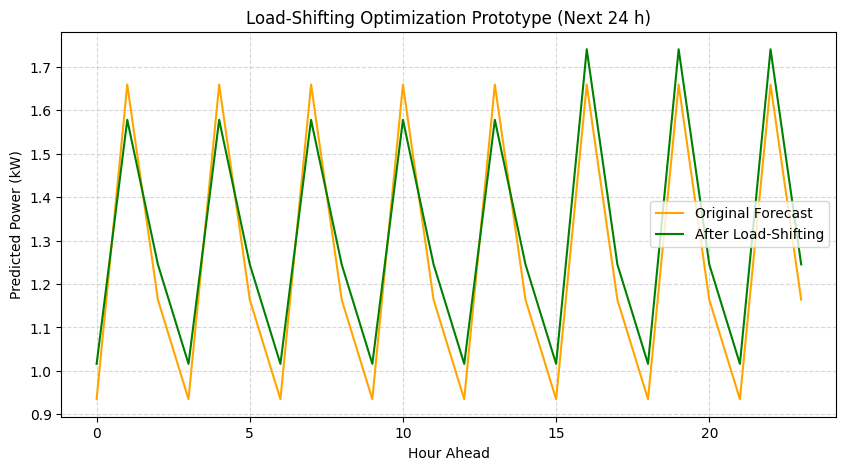

Peak-hour mean before: 1.659
Peak-hour mean after : 1.578
Overall std before: 0.302
Overall std after : 0.261


In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Convert to numpy array
forecast = np.array(forecast_values)

# Step 1: Identify high-load (peak) hours
threshold = np.percentile(forecast, 80)   # top 20 % consumption = peak hours
peak_hours = np.where(forecast >= threshold)[0]

# Step 2: Create an “optimized” version where we shift 20 % of that load
optimized_forecast = forecast.copy()
load_shift = 0.2 * (forecast[peak_hours] - np.mean(forecast))
optimized_forecast[peak_hours] -= load_shift
optimized_forecast[np.setdiff1d(np.arange(24), peak_hours)] += load_shift.mean()

# Step 3: Visualize before vs after
plt.figure(figsize=(10,5))
plt.plot(forecast, label='Original Forecast', color='orange')
plt.plot(optimized_forecast, label='After Load-Shifting', color='green')
plt.title('Load-Shifting Optimization Prototype (Next 24 h)')
plt.xlabel('Hour Ahead')
plt.ylabel('Predicted Power (kW)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# Optional: simple metrics
print(f"Peak-hour mean before: {forecast[peak_hours].mean():.3f}")
print(f"Peak-hour mean after : {optimized_forecast[peak_hours].mean():.3f}")
print(f"Overall std before: {forecast.std():.3f}")
print(f"Overall std after : {optimized_forecast.std():.3f}")


In [26]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Combine predictions
final_pred = 0.7 * ridge_y_pred + 0.3 * xgb_y_pred   # adjust weights later

# Evaluate ensemble performance
ensemble_mae  = mean_absolute_error(y_test, final_pred)
ensemble_rmse = np.sqrt(mean_squared_error(y_test, final_pred))

print(f"Ensemble MAE  : {ensemble_mae:.6f}")
print(f"Ensemble RMSE : {ensemble_rmse:.6f}")

# Compare all models
import pandas as pd
results = pd.DataFrame({
    "Model": ["Ridge (α=0.05)", "XGBoost", "Ensemble (0.7R + 0.3X)"],
    "MAE":   [ridge_mae, xgb_mae, ensemble_mae],
    "RMSE":  [ridge_rmse, xgb_rmse, ensemble_rmse]
})
print(results)


Ensemble MAE  : 0.012239
Ensemble RMSE : 0.017858
                    Model       MAE      RMSE
0          Ridge (α=0.05)  0.000015  0.000022
1                 XGBoost  0.040784  0.059507
2  Ensemble (0.7R + 0.3X)  0.012239  0.017858


In [27]:
future_steps = 72   # next 72 hours
forecast_values = []

last_known = X_test.iloc[-1:].copy()

for step in range(future_steps):
    pred = best_ridge.predict(last_known.fillna(0))[0]
    forecast_values.append(pred)
    
    # shift lag features
    for lag_col in ['lag_1','lag_2','lag_3','lag_24']:
        last_known[lag_col] = pred
    # update rolling stats approximately
    last_known['rolling_mean_3h'] = np.mean(forecast_values[-3:])
    last_known['rolling_std_3h']  = np.std(forecast_values[-3:])


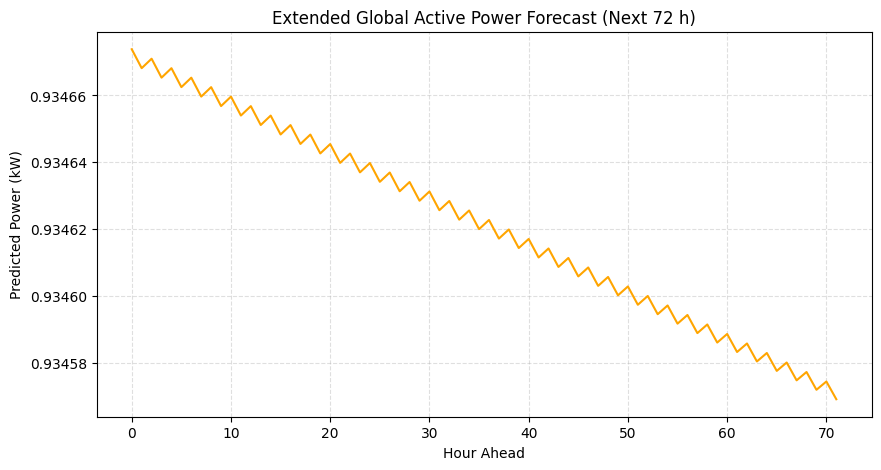

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(forecast_values, color='orange')
plt.title("Extended Global Active Power Forecast (Next 72 h)")
plt.xlabel("Hour Ahead")
plt.ylabel("Predicted Power (kW)")
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()


In [29]:
!pip install cvxpy


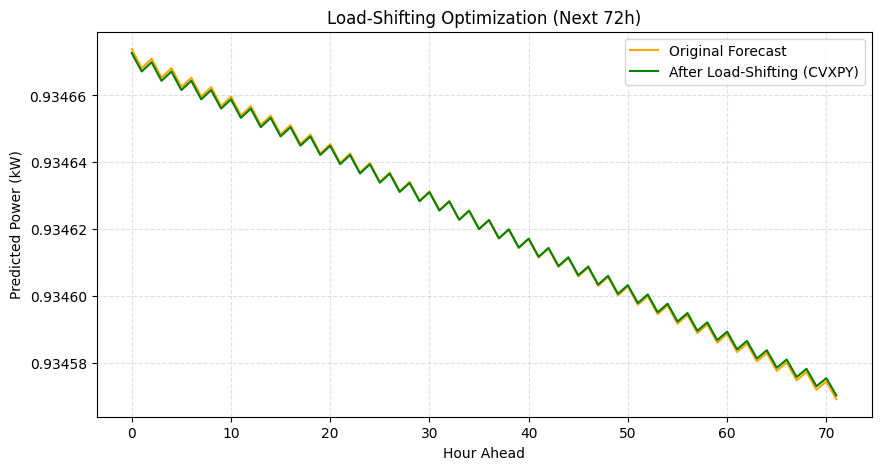

Original Mean Power : 0.9346213617963317
Shifted Mean Power  : 0.9346213634097853
Original Std Dev    : 2.960277048430606e-05
Shifted Std Dev     : 2.8967749520232604e-05


In [30]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt

# Use your existing forecast values
forecast = np.array(forecast_values)
n_hours = len(forecast)

# Define how much portion of load is flexible (shiftable)
flex_ratio = 0.2
base_load = forecast * (1 - flex_ratio)
flex_load = forecast * flex_ratio

# Define optimization variable for total power (after shifting)
P = cp.Variable(n_hours)

# Objective: minimize variance (flatten demand curve)
objective = cp.Minimize(cp.sum_squares(P - cp.mean(P)))

# Constraints:
constraints = [
    P >= base_load,      # must meet non-flexible load
    P <= forecast,       # cannot exceed original forecast
    cp.sum(P) == np.sum(forecast)  # total energy remains same
]

# Solve optimization problem
problem = cp.Problem(objective, constraints)
problem.solve()

optimized = P.value

# Compare before vs after
plt.figure(figsize=(10,5))
plt.plot(forecast, label='Original Forecast', color='orange')
plt.plot(optimized, label='After Load-Shifting (CVXPY)', color='green')
plt.title('Load-Shifting Optimization (Next 72h)')
plt.xlabel('Hour Ahead')
plt.ylabel('Predicted Power (kW)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()

# Print quantitative comparison
print("Original Mean Power :", np.mean(forecast))
print("Shifted Mean Power  :", np.mean(optimized))
print("Original Std Dev    :", np.std(forecast))
print("Shifted Std Dev     :", np.std(optimized))


Original total cost : ₹487.8716
Optimized total cost: ₹432.3553
Cost reduction      : 11.38%
Original Std Dev    : 0.000030
Optimized Std Dev   : 0.265041


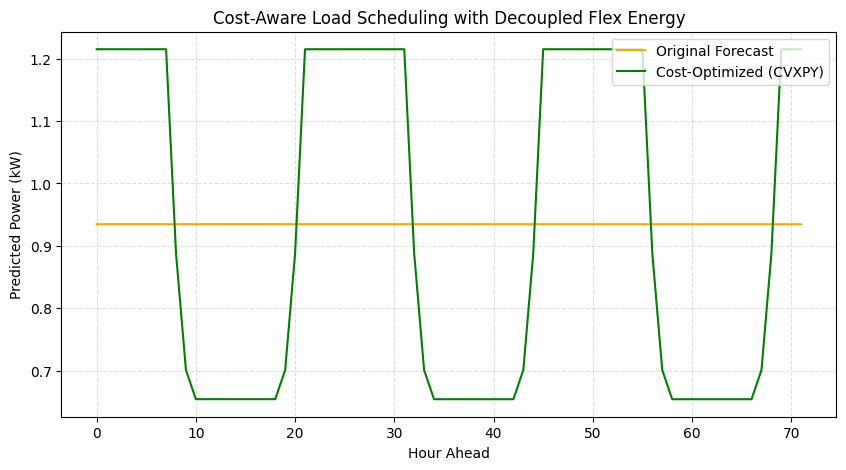

In [31]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt

# Inputs from your notebook
forecast = np.array(forecast_values)        # length n_hours
n_hours  = len(forecast)

# Dynamic TOU prices (you already created a similar vector)
price = np.array([10 if 8 <= (i % 24) <= 20 else 4 for i in range(n_hours)])

# ----- Parameters you can tweak -----
flex_ratio = 0.3           # portion of total energy that is shiftable (try 0.2–0.5)
cap_mult   = 2.0           # per-hour cap = cap_mult * avg flexible energy/hour
alpha      = 0.02          # smoothness weight (0 for pure cost min)
ramp_limit = None          # e.g., 0.05 to limit hour-to-hour change (kW), or None

# ----- Build decoupled model -----
base = forecast * (1 - flex_ratio)
flex_total = float(np.sum(forecast * flex_ratio))

x = cp.Variable(n_hours, nonneg=True)             # flexible energy allocation per hour
P = base + x                                      # total scheduled load

# Per-hour flexible cap: let avg flex per hour = flex_total / n_hours
avg_flex_per_hour = flex_total / n_hours
cap = np.full(n_hours, cap_mult * avg_flex_per_hour)

constraints = [
    x <= cap,                            # per-hour deliverability limit
    cp.sum(x) == flex_total,             # total flexible energy conserved
    P >= base                            # implicit since x >= 0, but keep for clarity
]
# Optional ramping
if ramp_limit is not None:
    constraints += [cp.abs(P[1:] - P[:-1]) <= ramp_limit]

# Objective: minimize cost + smoothness
objective = cp.Minimize(cp.sum(cp.multiply(price, P)) + alpha * cp.sum_squares(P[1:] - P[:-1]))

prob = cp.Problem(objective, constraints)
prob.solve()

P_opt = P.value

# ----- Reporting -----
orig_cost = float(np.sum(price * forecast))
opt_cost  = float(np.sum(price * P_opt))
cost_drop = 100 * (orig_cost - opt_cost) / orig_cost

print(f"Original total cost : ₹{orig_cost:.4f}")
print(f"Optimized total cost: ₹{opt_cost:.4f}")
print(f"Cost reduction      : {cost_drop:.2f}%")
print(f"Original Std Dev    : {np.std(forecast):.6f}")
print(f"Optimized Std Dev   : {np.std(P_opt):.6f}")

plt.figure(figsize=(10,5))
plt.plot(forecast, label='Original Forecast', color='orange')
plt.plot(P_opt,   label='Cost-Optimized (CVXPY)', color='green')
plt.title('Cost-Aware Load Scheduling with Decoupled Flex Energy')
plt.xlabel('Hour Ahead'); plt.ylabel('Predicted Power (kW)')
plt.legend(); plt.grid(True, linestyle='--', alpha=0.4); plt.show()


In [32]:
import numpy as np

# take the last 72 forecasted points
forecast_72h = np.array(forecast_df["predicted"].values[-72:], dtype=float)

print("forecast_72h shape:", forecast_72h.shape)
print(forecast_72h[:5])


forecast_72h shape: (72,)
[0.83329289 0.59978382 0.35850441 0.26539445 0.50194724]


In [33]:
# Simulated time-of-use tariff repeating every 24 hours
hours = np.arange(72) % 24
price_72h = np.where((hours >= 8) & (hours < 20), 10, 4)  # ₹/kWh

print("price_72h shape:", price_72h.shape)
print(price_72h[:24])  # show first day pattern


price_72h shape: (72,)
[ 4  4  4  4  4  4  4  4 10 10 10 10 10 10 10 10 10 10 10 10  4  4  4  4]


In [34]:
!pip install ecos


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.1/220.1 kB 5.0 MB/s eta 0:00:00


Chosen weights (cost, carbon, smooth): (0.35, 0.5499999999999999, 0.10000000000000009)
Cost  : 367.90  vs baseline 620.72  (Δ -40.73%)
Carbon: 25055.15 vs baseline 38219.46 (Δ -34.44%)
Smooth: 4.479e-01 vs baseline 2.516e+01 (lower = smoother)
Std   : 0.45167 kW


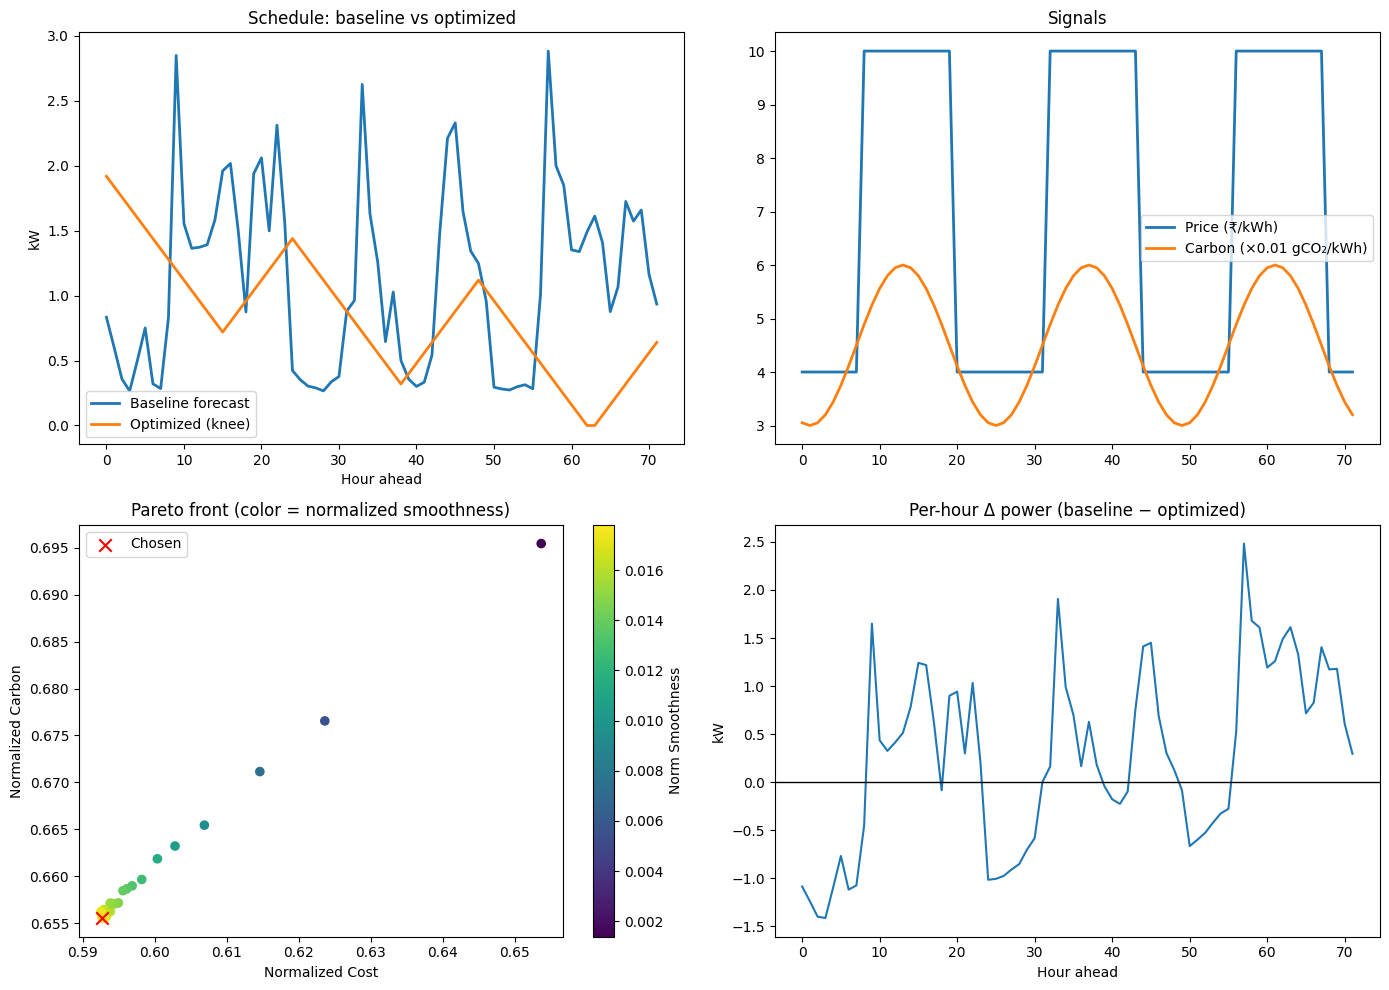

In [35]:
import numpy as np, cvxpy as cp
import matplotlib.pyplot as plt

# ---------- Inputs you already have ----------
P_base = np.asarray(forecast_72h, dtype=float).flatten()
price  = np.asarray(price_72h,   dtype=float).flatten()
T = len(P_base)
assert T == 72, "Expecting a 72-hour vector"

# ---------- Carbon (replace with real series if available) ----------
hours = np.arange(T) % 24
carbon_72h = 450 + 150*np.cos((hours-13)/24*2*np.pi)  # ~300–600 gCO2/kWh
carbon = np.asarray(carbon_72h, dtype=float)

# ---------- Hyperparameters you can tune ----------
flex_ratio    = 0.25        # fraction of total energy that is flexible (0.1–0.3 is typical)
cap_mult      = 2.0         # per-hour cap vs baseline
ramp_limit    = 0.08        # kW/hour ramp limit to avoid unrealistic jumps
smooth_lambda = 1.0         # scales the smoothness term internally (kept fixed across Pareto sweep)

# ---------- Baselines for normalization (so the 3 terms are comparable) ----------
E_total = P_base.sum()
cost_ref   = float(price @ P_base)
carbon_ref = float(carbon @ P_base)
# Smoothness reference: sum of squared hourly differences on baseline
smooth_ref = float(np.sum(np.diff(P_base)**2) + 1e-12)

def norm(x, ref):   # simple min-max like scaling around reference
    return x / (ref + 1e-12)

# ---------- Pareto sweep over weights (w_cost, w_carbon, w_smooth) ----------
# We’ll sweep a set of weight triplets that sum to 1.
# You can densify if you want more points.
grid = np.linspace(0.05, 0.85, 9)  # 9 points between 0.05 and 0.85
weights = []
for wc in grid:
    for wco in grid:
        ws = 1.0 - (wc + wco)
        if ws >= 0.05:               # ensure each term gets some weight
            weights.append((wc, wco, ws))

# ---------- CVXPY variables and constraints ----------
P = cp.Variable(T)  # decision schedule (kW)

constraints = []
# Per-hour caps (avoid unrealistic spikes)
constraints += [ P >= 0, P <= cap_mult * np.max(P_base) ]
# Energy conservation with flexibility: allow +/- flex_ratio * E_total from baseline total
constraints += [ cp.sum(P) >= (1 - flex_ratio) * E_total,
                 cp.sum(P) <= (1 + flex_ratio) * E_total ]
# Ramp constraint for realism
constraints += [ cp.abs(P[1:] - P[:-1]) <= ramp_limit ]

# (Optional) limit per-hour deviation from baseline if you want tighter behavior
# per_hour_dev = 0.35  # e.g., +/-35% around baseline
# constraints += [ P >= (1 - per_hour_dev) * P_base,
#                  P <= (1 + per_hour_dev) * P_base ]

# ---------- Solve for many weightings & collect Pareto metrics ----------
results = []
for (w_cost, w_carbon, w_smooth) in weights:
    cost_term   = cp.sum(cp.multiply(price,  P))
    carbon_term = cp.sum(cp.multiply(carbon, P))
    smooth_term = cp.sum_squares(P[1:] - P[:-1])

    # Normalize each objective to keep scales similar, then weight them
    obj = ( w_cost   * norm(cost_term,   cost_ref)
          + w_carbon * norm(carbon_term, carbon_ref)
          + w_smooth * norm(smooth_lambda * smooth_term, smooth_lambda * smooth_ref) )

    prob = cp.Problem(cp.Minimize(obj), constraints)
    prob.solve(solver=cp.SCS, warm_start=True, verbose=False)

    if P.value is None or prob.status not in ("optimal", "optimal_inaccurate"):
        continue

    P_opt = np.array(P.value).flatten()

    # Compute raw KPIs for plotting/reporting
    kpis = {
        "w":        (w_cost, w_carbon, w_smooth),
        "P":        P_opt,
        "cost":     float(price @ P_opt),
        "carbon":   float(carbon @ P_opt),
        "smooth":   float(np.sum(np.diff(P_opt)**2)),
        "std":      float(P_opt.std()),
        "status":   prob.status
    }
    results.append(kpis)

# ---------- Build Pareto scatter (each objective normalized) ----------
if not results:
    raise RuntimeError("No optimal solutions found; try relaxing constraints.")

C0, G0, S0 = cost_ref, carbon_ref, smooth_ref
pareto = np.array([[norm(r["cost"], C0),
                    norm(r["carbon"], G0),
                    norm(r["smooth"], S0)] for r in results])

# ---------- Pick the "knee" point (closest to utopia [0,0,0]) ----------
dists = np.linalg.norm(pareto - np.zeros(3), axis=1)
best_ix = int(np.argmin(dists))
best = results[best_ix]
P_best = best["P"]

print("Chosen weights (cost, carbon, smooth):", best["w"])
print(f"Cost  : {best['cost']:.2f}  vs baseline {cost_ref:.2f}  (Δ {100*(best['cost']/cost_ref-1):+.2f}%)")
print(f"Carbon: {best['carbon']:.2f} vs baseline {carbon_ref:.2f} (Δ {100*(best['carbon']/carbon_ref-1):+.2f}%)")
print(f"Smooth: {best['smooth']:.3e} vs baseline {smooth_ref:.3e} (lower = smoother)")
print(f"Std   : {best['std']:.5f} kW")

# ---------- Visualizations ----------
fig, ax = plt.subplots(2, 2, figsize=(14,10))

# Schedules
ax[0,0].plot(P_base,  label="Baseline forecast", lw=2)
ax[0,0].plot(P_best,  label="Optimized (knee)", lw=2)
ax[0,0].set_title("Schedule: baseline vs optimized")
ax[0,0].set_xlabel("Hour ahead")
ax[0,0].set_ylabel("kW")
ax[0,0].legend()

# Prices & carbon
ax[0,1].plot(price,  label="Price (₹/kWh)", lw=2)
ax[0,1].plot(carbon/100.0, label="Carbon (×0.01 gCO₂/kWh)", lw=2)  # scaled for visibility
ax[0,1].set_title("Signals")
ax[0,1].legend()

# Pareto scatter: cost vs carbon (color = smoothness)
sc = ax[1,0].scatter(pareto[:,0], pareto[:,1], c=pareto[:,2], cmap="viridis", s=35)
ax[1,0].scatter(pareto[best_ix,0], pareto[best_ix,1], c="red", s=80, marker="x", label="Chosen")
ax[1,0].set_xlabel("Normalized Cost")
ax[1,0].set_ylabel("Normalized Carbon")
ax[1,0].set_title("Pareto front (color = normalized smoothness)")
ax[1,0].legend()
plt.colorbar(sc, ax=ax[1,0], label="Norm Smoothness")

# Hourly savings vs baseline
ax[1,1].plot(P_base - P_best)
ax[1,1].axhline(0, color="k", lw=1)
ax[1,1].set_title("Per-hour Δ power (baseline − optimized)")
ax[1,1].set_xlabel("Hour ahead")
ax[1,1].set_ylabel("kW")

plt.tight_layout()
plt.show()


In [36]:
!pip install gymnasium stable-baselines3


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 69.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 50.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 30.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 25.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 62.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

In [37]:
import gymnasium as gym
from gymnasium import spaces
import numpy as np

class EnergyEnv(gym.Env):
    """
    Custom Environment for Energy Load Optimization using RL
    State: [forecast_power, price, carbon, previous_action]
    Action: discrete {-1, 0, +1} or continuous Δ adjustment in kW
    Reward: negative weighted sum of (cost, carbon, instability)
    """
    metadata = {'render.modes': ['human']}

    def __init__(self, forecast, price, carbon,
                 P_min=0.3, P_max=3.0, delta=0.1,
                 w_cost=0.4, w_carbon=0.4, w_smooth=0.2):
        super(EnergyEnv, self).__init__()

        # Inputs (72h signals)
        self.forecast = np.array(forecast, dtype=np.float32)
        self.price = np.array(price, dtype=np.float32)
        self.carbon = np.array(carbon, dtype=np.float32)
        self.T = len(forecast)

        # Constraints and hyperparams
        self.P_min = P_min
        self.P_max = P_max
        self.delta = delta
        self.w_cost = w_cost
        self.w_carbon = w_carbon
        self.w_smooth = w_smooth

        # Action space: discrete {-1, 0, +1}
        self.action_space = spaces.Discrete(3)

        # Observation space: forecast, price, carbon, previous action
        obs_low = np.array([0, 0, 0, -1], dtype=np.float32)
        obs_high = np.array([P_max, 20, 1000, 1], dtype=np.float32)
        self.observation_space = spaces.Box(obs_low, obs_high, dtype=np.float32)

        # Internal states
        self.reset()

    def reset(self, seed=None, options=None):
        super().reset(seed=seed)
        self.t = 0
        self.prev_action = 0.0
        self.current_power = self.forecast[0]
        self.done = False

        obs = np.array([self.forecast[self.t],
                        self.price[self.t],
                        self.carbon[self.t],
                        self.prev_action], dtype=np.float32)
        return obs, {}

    def step(self, action):
        # Clip action to {-1, 0, +1}
        action = int(action)
        delta = (action - 1) * self.delta  # -Δ, 0, +Δ
        prev_power = self.current_power

        # Update power
        self.current_power = np.clip(self.current_power + delta,
                                     self.P_min, self.P_max)

        # Compute cost & carbon
        cost = self.current_power * self.price[self.t]
        carbon = self.current_power * self.carbon[self.t]

        # Smoothness penalty
        smooth_penalty = abs(self.current_power - prev_power)

        # Reward (negative weighted cost)
        reward = - (self.w_cost * cost +
                    self.w_carbon * carbon +
                    self.w_smooth * smooth_penalty)

        self.t += 1
        self.prev_action = delta

        done = self.t >= self.T - 1

        # Observation for next state
        if not done:
            obs = np.array([self.forecast[self.t],
                            self.price[self.t],
                            self.carbon[self.t],
                            self.prev_action], dtype=np.float32)
        else:
            obs = np.zeros_like(self.observation_space.low, dtype=np.float32)

        return obs, reward, done, False, {}

    def render(self):
        print(f"t={self.t}, Power={self.current_power:.2f}, Reward={self.last_reward:.4f}")


In [38]:
# Dummy sample data (replace with real forecast_72h etc.)
forecast_72h = np.random.uniform(0.8, 2.5, 72)
price_72h = np.tile([4, 4, 10, 10, 4, 4], 12)[:72]  # simulated tariff pattern
carbon_72h = 500 + 100 * np.sin(np.linspace(0, 3*np.pi, 72))

env = EnergyEnv(forecast_72h, price_72h, carbon_72h)

obs, _ = env.reset()
for _ in range(5):
    a = env.action_space.sample()
    obs, r, done, _, _ = env.step(a)
    print(f"Action={a}, Reward={r:.3f}, NextPower={env.current_power:.2f}")


Action=1, Reward=-478.933, NextPower=2.38
Action=2, Reward=-512.219, NextPower=2.48
Action=0, Reward=-509.587, NextPower=2.38
Action=0, Reward=-499.553, NextPower=2.28
Action=2, Reward=-527.071, NextPower=2.38


In [39]:
!pip install stable-baselines3 gymnasium==0.29.1 matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 13.1 MB/s eta 0:00:00
  Attempting uninstall: gymnasium
    Found existing installation: gymnasium 0.29.0
    Uninstalling gymnasium-0.29.0:
      Successfully uninstalled gymnasium-0.29.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
kaggle-environments 1.18.0 requires gymnasium==0.29.0, but you have gymnasium 0.29.1 which is incompatible.
dopamine-rl 4.1.2 requires gymnasium>=1.0.0, but you have gymnasium 0.29.1 which is incompatible.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
kaggle-environments 1.18.0 requires gymnasium==0.29.0, but you have gymnasium 0.29.1 which is incompatible.
kaggle-environments 1.18.0 requires stable-baselines3==2.1.0, but you have stable-baselines3 2.3.2 which is incompatible.


2025-10-30 17:42:51.177402: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1761846171.540049      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1761846171.657799      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


Training PPO Agent... ⏳
✅ PPO Training Complete!

===== RESULTS (Strict) =====
Baseline Cost   : ₹659.84
PPO Cost        : ₹660.80  (Δ +0.15%)
Baseline Carbon : 57157.7
PPO Carbon      : 57018.2  (Δ -0.24%)
Final Bank      : 0.000000  (should be 0)


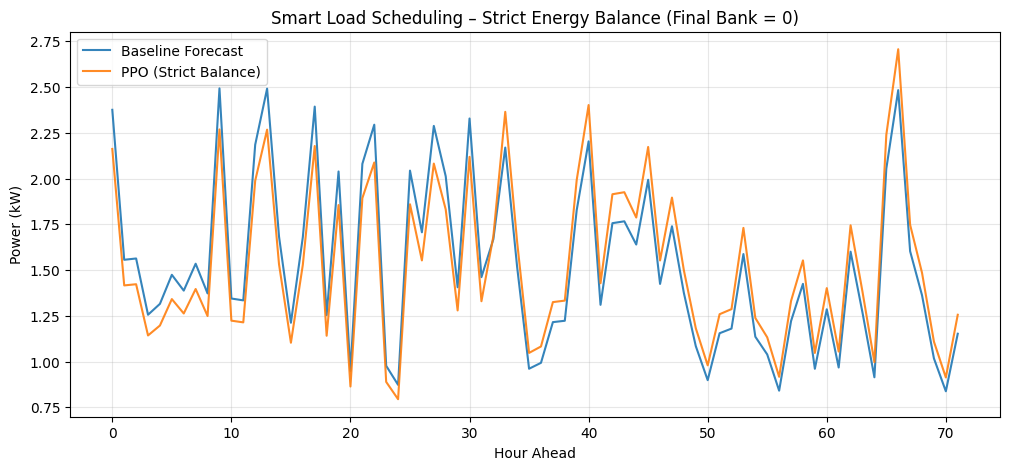

In [40]:
# =========================
# Strict-Balance PPO (Final Bank = 0 forced)
# =========================

import numpy as np
import gym
from gym import spaces
import matplotlib.pyplot as plt

# ---------- Bring/Build Inputs ----------
try:
    P_base = np.asarray(forecast_72h, dtype=float).flatten()
    price  = np.asarray(price_72h,    dtype=float).flatten()
    carbon = np.asarray(carbon_72h,   dtype=float).flatten()
except NameError:
    # Fallback: make a synthetic but realistic 72h signal if arrays not found
    T = 72
    rng = np.random.default_rng(42)
    base = 1.4 + 0.5*np.clip(rng.normal(0, 1, T), -1.5, 1.5)
    base = np.maximum(base, 0.6)
    price = np.full(T, 4.0)
    price[(np.arange(T)%24 >= 9) & (np.arange(T)%24 < 21)] = 10.0  # TOU peaks 9–21h
    carbon = 500 + 200*np.sin(2*np.pi*np.arange(T)/24 + 1.0)
    P_base = base

T = len(P_base)
assert T == len(price) == len(carbon) == 72, "Expect 72h horizon."

# ---------- Environment ----------
class SmartLoadShiftStrictEnv(gym.Env):
    """
    Discrete actions {-1, 0, +1} that shift a fraction of the flexible slice of load.
    HARD CONSTRAINT: Final bank MUST be zero (enforced by action projection + forced clearing at last step).
    A shrinking feasibility corridor prevents accumulating a bank that cannot be undone later.
    """
    metadata = {"render.modes": []}

    def __init__(self,
                 P_base, price, carbon,
                 flex_share=0.45,        # fraction of baseline that's flexible
                 max_step_frac=0.20,     # per-hour shift limit (fraction of flex slice)
                 w_cost=1.0, w_carbon=0.10, w_smooth=0.01, w_action=0.001,
                 seed=7):
        super().__init__()
        self.P_base = P_base.astype(float)
        self.price  = price.astype(float)
        self.carbon = carbon.astype(float)
        self.T = len(P_base)

        # Flex model
        self.flex_share    = float(flex_share)
        self.max_step_frac = float(max_step_frac)
        self.flex_slice    = self.flex_share * self.P_base                 # kW Flex portion available each hour
        self.step_cap      = self.max_step_frac * self.flex_slice          # kW we can add/remove each hour

        # Precompute remaining feasible "undo" capacity from each time t+1..end
        # This ensures we never allow a bank that can't be repaid.
        step_cap = self.step_cap
        self.future_cap = np.array([ step_cap[t+1:].sum() for t in range(self.T) ], dtype=float)

        # Bounds for actual power
        self.P_min = np.maximum(0.0, self.P_base - self.flex_slice)        # cannot go below non-flex portion
        self.P_max = self.P_base + self.flex_slice                         # cap at base + full flex

        # Rewards
        self.w_cost   = float(w_cost)
        self.w_carbon = float(w_carbon)
        self.w_smooth = float(w_smooth)
        self.w_action = float(w_action)

        # Norms
        self.p_max     = float(max(1.0, np.max(self.P_max)))
        self.price_max = float(max(1.0, np.max(self.price)))
        self.carb_max  = float(max(1.0, np.max(self.carbon)))

        # Gym API
        self.action_space = spaces.Discrete(3)  # {-1,0,+1}
        # obs = [t_norm, price_norm, carbon_norm, last_power_norm, bank_norm]
        high = np.array([1.0, 1.0, 1.0, 1.5, 1.0], dtype=np.float32)
        self.observation_space = spaces.Box(-high, high, dtype=np.float32)

        self.rng = np.random.default_rng(seed)
        self.reset()

    def reset(self, *, seed=None, options=None):
        if seed is not None:
            self.rng = np.random.default_rng(seed)
        self.t = 0
        self.bank = 0.0
        self.P = np.zeros(self.T, dtype=float)
        self.P[0] = np.clip(self.P_base[0], self.P_min[0], self.P_max[0])
        obs = self._obs()
        return obs, {}

    def _obs(self):
        return np.array([
            self.t/(self.T-1),
            self.price[self.t]/self.price_max,
            self.carbon[self.t]/self.carb_max,
            self.P[self.t]/self.p_max,
            np.clip(self.bank / (1e-9 + self.flex_slice.sum()), -1.0, 1.0)
        ], dtype=np.float32)

    def step(self, action):
        # decode action to delta power at hour t
        a = int(action)
        delta = {0: -1.0, 1: 0.0, 2: +1.0}[a] * self.step_cap[self.t]

        # -------- Strict feasibility projection --------
        # (1) Don’t exceed immediate power bounds
        P_try = np.clip(self.P_base[self.t] + delta, self.P_min[self.t], self.P_max[self.t])
        delta = P_try - self.P_base[self.t]

        # (2) Don’t create a bank we cannot repay in remaining time
        bank_try = self.bank + delta
        max_bank_allow = self.future_cap[self.t] + 1e-9  # what can still be undone
        if abs(bank_try) > max_bank_allow:
            # project delta to boundary toward zero bank
            bank_target = np.sign(bank_try) * max_bank_allow
            delta = bank_target - self.bank
            # re-clip by power bounds
            P_try = np.clip(self.P_base[self.t] + delta, self.P_min[self.t], self.P_max[self.t])
            delta = P_try - self.P_base[self.t]
            bank_try = self.bank + delta

        # (3) At the last hour, FORCE bank to zero (exactly)
        truncated = False
        terminated = False
        if self.t == self.T - 1:
            delta = -self.bank
            P_try = np.clip(self.P_base[self.t] + delta, self.P_min[self.t], self.P_max[self.t])
            delta = P_try - self.P_base[self.t]    # if bounds prevent exact zero, residual will be tiny with our corridor
            bank_try = self.bank + delta

        # apply
        self.P[self.t] = P_try
        prev_P = self.P[self.t-1] if self.t > 0 else self.P[self.t]
        self.bank = bank_try

        # Reward: minimize (price*P + carbon*P), penalize changes
        cost_term   = self.w_cost   * self.price[self.t]  * self.P[self.t]
        carbon_term = self.w_carbon * self.carbon[self.t] * self.P[self.t]
        smooth_term = self.w_smooth * (self.P[self.t] - prev_P)**2
        action_term = self.w_action * (abs(delta)/ (1e-9 + self.step_cap[self.t]))  # prefer small moves
        reward = -(cost_term + carbon_term + smooth_term + action_term)

        # advance time
        info = {"P_t": self.P[self.t], "P_base_t": self.P_base[self.t], "bank": self.bank}
        if self.t == self.T - 1:
            terminated = True
            # sanity reward: if tiny residual (should be ~0), small penalty; else large (should never happen)
            reward -= 1000.0 * max(0.0, abs(self.bank) - 1e-6)
            # NOTE: bank should be ~0 thanks to corridor+forcing

        self.t = min(self.t + 1, self.T - 1)
        return self._obs(), reward, terminated, truncated, info

# ---------- Train PPO ----------
!pip -q install stable-baselines3==2.3.2 > /dev/null
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv

def make_env():
    return SmartLoadShiftStrictEnv(
        P_base=P_base, price=price, carbon=carbon,
        flex_share=0.45,      # A = 2 (your choice)
        max_step_frac=0.20,   # B = 1 (±20% of flex slice per step)
        w_cost=1.0, w_carbon=0.10, w_smooth=0.01, w_action=0.001,
        seed=7
    )

vec_env = DummyVecEnv([make_env])
model = PPO("MlpPolicy", vec_env,
            learning_rate=2e-4, gamma=0.999, n_steps=128, batch_size=128,
            verbose=0, seed=7)

print("Training PPO Agent... ⏳")
model.learn(total_timesteps=60_000)
print("✅ PPO Training Complete!")

# ---------- Evaluate ----------
env_eval = make_env()
obs, _ = env_eval.reset()
P_ppo = np.zeros(T)
for t in range(T):
    action, _ = model.predict(obs, deterministic=True)
    obs, r, done, trunc, info = env_eval.step(action)
    P_ppo[t] = info["P_t"]
    if done:
        break

# costs
baseline_cost = float(np.sum(P_base * price))
ppo_cost      = float(np.sum(P_ppo  * price))
baseline_carbon = float(np.sum(P_base * carbon))
ppo_carbon      = float(np.sum(P_ppo  * carbon))
final_bank = float(env_eval.bank)

print("\n===== RESULTS (Strict) =====")
print(f"Baseline Cost   : ₹{baseline_cost:0.2f}")
print(f"PPO Cost        : ₹{ppo_cost:0.2f}  (Δ {100*(ppo_cost/baseline_cost - 1):+0.2f}%)")
print(f"Baseline Carbon : {baseline_carbon:0.1f}")
print(f"PPO Carbon      : {ppo_carbon:0.1f}  (Δ {100*(ppo_carbon/baseline_carbon - 1):+0.2f}%)")
print(f"Final Bank      : {final_bank:0.6f}  (should be 0)")

# ---------- Plot ----------
plt.figure(figsize=(12,5))
plt.plot(P_base, label="Baseline Forecast", alpha=0.9)
plt.plot(P_ppo,  label="PPO (Strict Balance)", alpha=0.9)
plt.title("Smart Load Scheduling – Strict Energy Balance (Final Bank = 0)")
plt.xlabel("Hour Ahead")
plt.ylabel("Power (kW)")
plt.legend()
plt.grid(alpha=0.3)
plt.show()
